## The aim of this analysis is to determine:
### i) the top age groups
### ii) the most patronized banks
### iii) the most used channel of transaction

In [1]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

C:\Users\Yemi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [2]:
#Reading dataset

df = pd.read_excel('Killa.xlsx')
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['1992-11-10 00:00:00']}"
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-12T20:22:38.986000Z', 'tx_amount': 38445, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'ABank', 'dob': ['n/a']}"
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T06:00:46.904000Z', 'tx_amount': 29627, 'tx_mode': 'Debit', 'tx_channel': 'mobile', 'bank_name': 'GBank', 'dob': ['1992-01-01 00:00:00']}"
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T16:10:51.479000Z', 'tx_amount': 27791, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'KBank', 'dob': ['1981-01-07 00:00:00']}"
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date': '2020-06-13T05:28:47.543000Z', 'tx_amount': 6192, 'tx_mode': 'Debit', 'tx_channel': 'web', 'bank_name': 'QBank', 'dob': ['n/a']}"


In [3]:
from datetime import  datetime
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
#The Transaction column is stored in json format so we can use map function and then normalize it

df['transaction'] = df['transaction'].map(eval)

In [5]:
pd.json_normalize(df['transaction'])

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...
122,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [6]:
#Merging the normalized transaction column into our dataframe

df = pd.concat([df[['First Name', 'Last Name']],pd.json_normalize(df['transaction'])], axis=1)
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [7]:
#Dealing with the square brackets

df['dob'] = df['dob'].str[0].replace("[", '')
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a


In [8]:
#Saving dataframe to csv format

df.to_csv('killa.csv')

In [9]:
df = pd.read_csv('killa.csv', parse_dates = ['dob'])
df.head()

,Unnamed: 0,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10
1,1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT
2,2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01
3,3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07
4,4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT


In [10]:
df['year'] = pd.to_datetime(df.dob, unit='ms').dt.year
df.head()

,Unnamed: 0,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year
0,0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10,1992.0
1,1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT,NaN
2,2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01,1992.0
3,3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07,1981.0
4,4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT,NaN


In [11]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

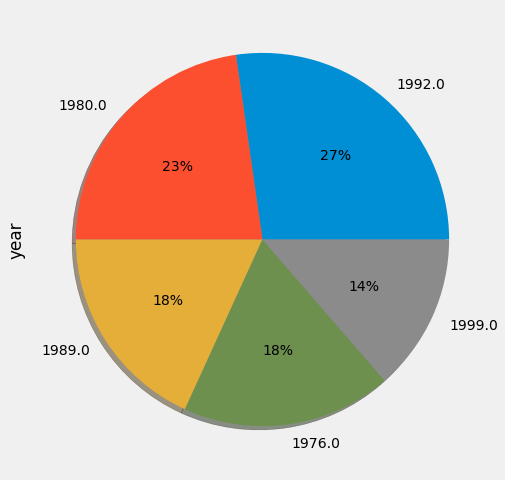

In [12]:
#Acquiring the top five year-group of customers

plt.figure(figsize=(15, 8))
df['year'].value_counts().head().plot(kind='pie', autopct="%1.f%%", shadow=True)

### The frequent occurence of age in descending order: 1992, 1980, 1989, 1976, 1999

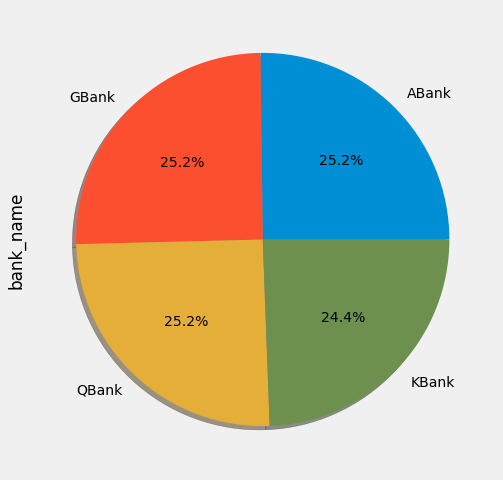

In [13]:
#Getting frequency information on banks

plt.figure(figsize=(15, 8))
df['bank_name'].value_counts().head().plot(kind='pie', autopct="%1.1f%%", shadow=True)

### ABank, QBank, GBank all had the same usage of 25.2% while KBank had 24.4% usage

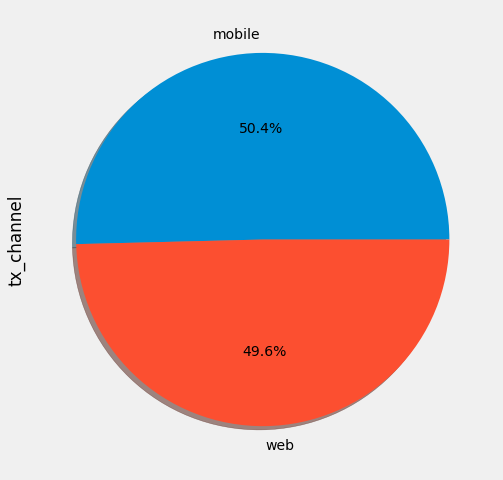

In [14]:
#Information about most used transaction channels

plt.figure(figsize=(15, 8))
df['tx_channel'].value_counts().plot(kind='pie', autopct="%1.1f%%", shadow=True)

### Mobile transactions topped Web transactions with a ratio of 50.4% to 49.6%. Very close!